## Function Transformer

In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as stats 
import matplotlib.pyplot as  plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer 


In [2]:
df=pd.read_csv('tested.csv',usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [4]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
X_train, X_test, y_train, y_test=train_test_split(df.iloc[:,1:3],df.iloc[:,0],test_size=0.2)

In [9]:
X_train.shape

(334, 2)

In [10]:
X_train.head()

,Age,Fare
248,29.00000,26.000
189,40.00000,13.000
275,20.00000,26.000
312,30.27259,7.575
207,24.00000,10.500


C:\Users\sanga\AppData\Local\Temp\ipykernel_15012\2708019148.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], kde=True, color='blue')


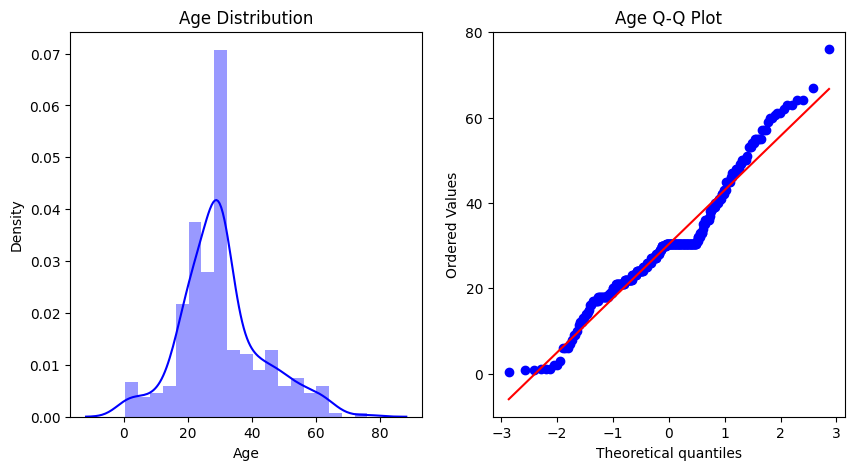

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(X_train['Age'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age Q-Q Plot')
plt.show()

C:\Users\sanga\AppData\Local\Temp\ipykernel_15012\3876387930.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'], kde=True, color='green')


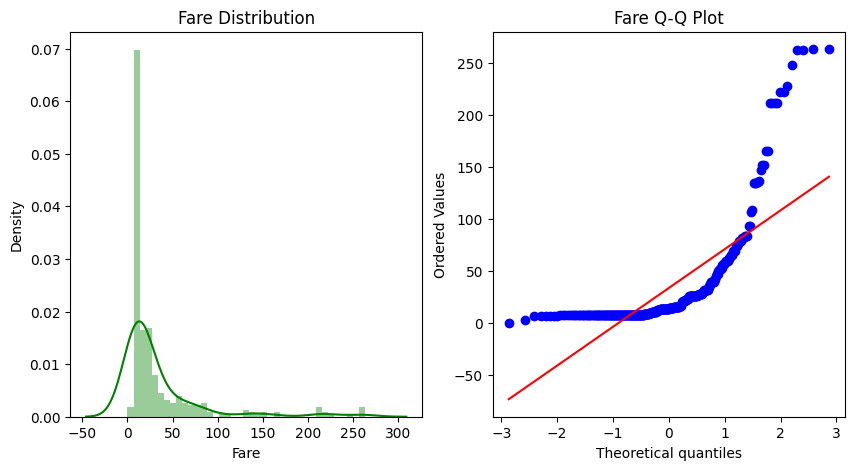

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(X_train['Fare'], kde=True, color='green')
plt.title('Fare Distribution')
plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare Q-Q Plot')
plt.show()


In [13]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [14]:
clf.fit(X_train, y_train)

LogisticRegression()

In [15]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred2))

Logistic Regression Accuracy: 0.6309523809523809
Decision Tree Accuracy: 0.5476190476190477


In [17]:
trf=FunctionTransformer(func=np.log1p)

In [18]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [19]:
clf3=LogisticRegression()
clf4=DecisionTreeClassifier()

In [20]:
clf3.fit(X_train_transformed,y_train)
clf4.fit(X_train_transformed,y_train)


DecisionTreeClassifier()

In [21]:
y_pred_3=clf3.predict(X_test_transformed)
y_pred_4=clf4.predict(X_test_transformed)
print("Logistic Regression with Transformation Accuracy:", accuracy_score(y_test, y_pred_3))
print("Decision Tree with Transformation Accuracy:", accuracy_score(y_test, y_pred_4))

Logistic Regression with Transformation Accuracy: 0.5952380952380952
Decision Tree with Transformation Accuracy: 0.5714285714285714


In [22]:
trf=ColumnTransformer([('log',FunctionTransformer(func=np.log1p),['Fare'])],remainder='passthrough')

In [23]:
X_train_selected_transformed=trf.fit_transform(X_train)
X_test_selected_transformed=trf.transform(X_test)
clf5=LogisticRegression()
clf6=DecisionTreeClassifier()
clf5.fit(X_train_selected_transformed,y_train)
clf6.fit(X_train_selected_transformed,y_train)
y_pred_5=clf5.predict(X_test_selected_transformed)
y_pred_6=clf6.predict(X_test_selected_transformed)
print("Logistic Regression with ColumnTransformer Accuracy:", accuracy_score(y_test, y_pred_5))
print("Decision Tree with ColumnTransformer Accuracy:", accuracy_score(y_test, y_pred_6))


Logistic Regression with ColumnTransformer Accuracy: 0.5952380952380952
Decision Tree with ColumnTransformer Accuracy: 0.5833333333333334
